In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(most_recent_date)

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all() 

# Calculate the date one year from the last date in data set.
# Calculate the last date in the dataset 
last_date = session.query(func.max(Measurement.date)).scalar()
print(last_date)


2017-08-23


In [35]:
# date one year from the last recorded date
latest_date = dt.datetime.strptime(last_date, '%Y-%m-%d')
one_year_later = latest_date + dt.timedelta(days=-365)
print(one_year_later)


2016-08-23 00:00:00


In [12]:
# date one year from the last recorded date
latest_date_1 = dt.datetime.strptime(last_date, '%Y-%m-%d')
one_year_prior = latest_date + dt.timedelta(days=-365)
print(one_year_prior)


2016-08-23 00:00:00


In [32]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
pcp_1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

pcp_1_df = pd.DataFrame(pcp_1)
pcp_1_df_final_df = pcp_1_df.set_index("date")
pcp_1_df_final_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [31]:
#Create Dictionary for prcp data
pcp_1_dict = {Date:Prcp for Date,Prcp in pcp_1}
pcp_1_dict

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

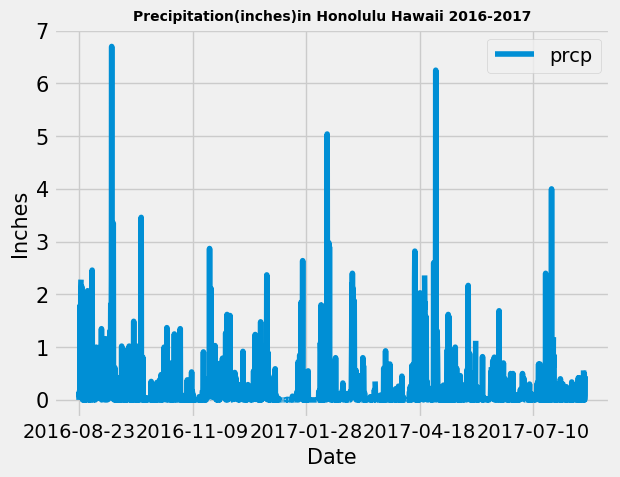

<function matplotlib.pyplot.savefig(*args, **kwargs)>

<Figure size 640x480 with 0 Axes>

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
pcp_1_df_final_df.plot()

# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.title(f"Precipitation(inches)in Honolulu Hawaii 2016-2017",fontsize=10, fontweight = 'bold')
plt.yticks(size=15)

# Show plot
plt.show()
plt.tight_layout()

# save fig to png 
plt.savefig

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = pcp_1_df_final_df.describe()
summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Station).count()
print(f"The total Number of Stations = {stations_count}")

The total Number of Stations = 9


In [29]:
stations_1 = session.query(Station.station).all()
stations_1_list = list(np.ravel(stations_1))


['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (
    session.query(Measurement.station, Station.name, func.count(Measurement.id))
    .filter(Measurement.station == Station.station)
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.id).desc())
    .all()
)
print("The most active stations are:")
print(active_stations)
type(active_stations)

The most active stations are:
[('USC00519281', 'WAIHEE 837.5, HI US', 2772), ('USC00519397', 'WAIKIKI 717.2, HI US', 2724), ('USC00513117', 'KANEOHE 838.1, HI US', 2709), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979), ('USC00517948', 'PEARL CITY, HI US', 1372), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]


list

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
temperature_summary = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for station in temperature_summary:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, 
       Measurement.tobs]
temperature_data_USC00519281 = session.query(*sel).\
        filter(func.strftime(Measurement.date) >= one_year_prior, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

In [20]:
# create a Dataframe with the resuts of the above query 
temperature_data_USC00519281_df = pd.DataFrame(temperature_data_USC00519281, columns=['Measurement Date', 'Temperature'])
temperature_data_USC00519281_df.head()

,Measurement Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


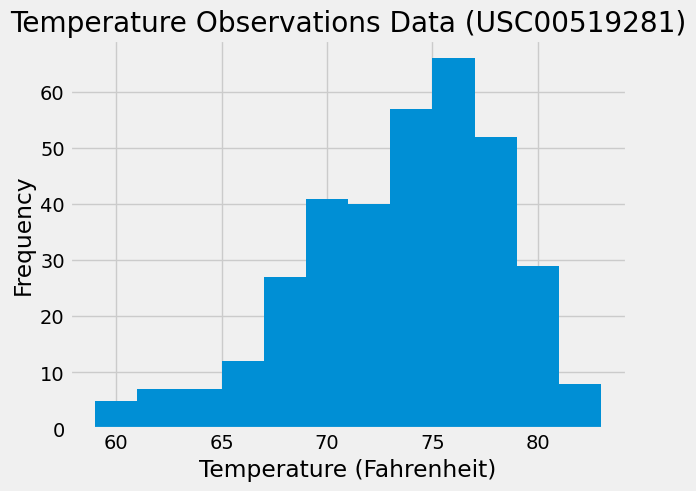

In [21]:
# Creating Histogram 
plt.hist(temperature_data_USC00519281_df['Temperature'],bins=12, density=False)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.title("Temperature Observations Data (USC00519281)")
plt.figsize=(12,10)
plt.savefig('Temperature_USC00519281.png',bbox_inches='tight')
plt.show()

# Close session

In [22]:
# Close Session
session.close()